***Importing the libraries for to load the data and analyse the data set***

In [9]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline


In [10]:
import warnings
warnings.filterwarnings("ignore")

Loading the dat

In [11]:
df=pd.read_csv("Telco_Cusomer_Churn.csv")

In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Describing the data

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Analysing the data

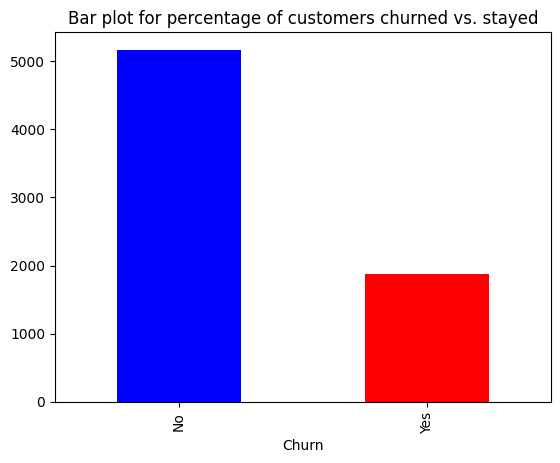

In [16]:
#What percentage of customers churned vs. stayed?

churn_count=df["Churn"].value_counts()

churn_count.plot(kind="bar",color=["blue","red"])
plt.title("Bar plot for percentage of customers churned vs. stayed")
plt.show()

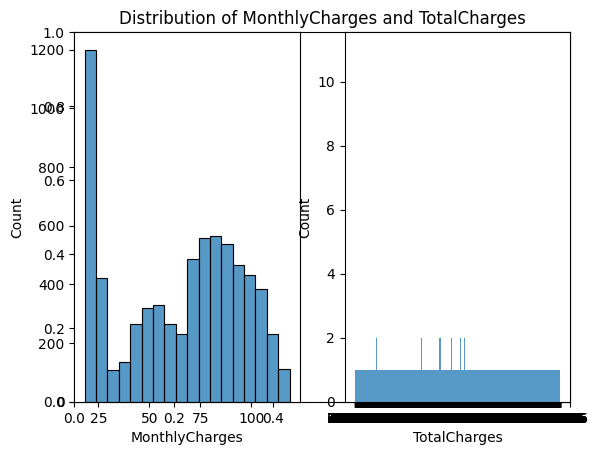

In [17]:
#Distribution of MonthlyCharges and TotalCharges
plt.title("Distribution of MonthlyCharges and TotalCharges")
plt.subplot(1,2,1)
sns.histplot(df["MonthlyCharges"])


plt.subplot(1,2,2)
sns.histplot(df["TotalCharges"].dropna())
plt.show()

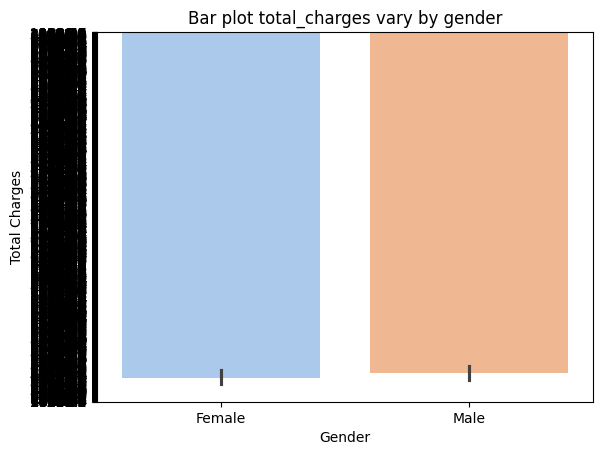

In [18]:
#Does total_charges vary by gender?
sns.barplot(data=df,x="gender",y="TotalCharges",palette="pastel")
plt.title("Bar plot total_charges vary by gender")
plt.xlabel("Gender")
plt.ylabel("Total Charges")
plt.show()

***Feature Engineering***

In [19]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

Encoding binary data columns

Used LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder

# Binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for multi-category columns
cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

 Standardization process

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
df.drop('customerID', axis=1, inplace=True)

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.128655,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,1.613701,1,1,1.277533,2.243151,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.854469,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.872062,1,...,False,False,False,False,False,False,False,False,False,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

Counting unique data in churn column

In [25]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Importing the library for training and testing split

In [26]:
from sklearn.model_selection import train_test_split

Deviding data in 2 parts for input and output

In [27]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

Importing over sampler for to balance the output columns

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ro=RandomOverSampler()

Resampling input and output

In [31]:
x_resample,y_resample=ro.fit_resample(x,y)

Spliting data into training and testing parts

In [32]:
#spliting the data into training and testing part
X_train,X_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=42)

In [33]:
# === 4. Models to Compare ===
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# === 5. Train, Evaluate & Track Best ===
best_model_name = None
best_score = -np.inf
best_pipeline = None

for name, clf in models.items():
    pipeline = Pipeline(steps=[
        ("classifier", clf)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0.0
    
    print(f"\n📊 {name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    
    # Use ROC-AUC to pick best (better for imbalance)
    if roc > best_score:
        best_score = roc
        best_model_name = name
        best_pipeline = pipeline

# === 6. Save Best Model ===
model_filename = "telco_churn_best_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump((best_pipeline, sklearn.__version__), f)

print(f"\n✅ Best Model: {best_model_name} (ROC-AUC = {best_score:.4f}) saved as {model_filename}")


📊 Decision Tree Results:
Accuracy: 0.8821
F1 Score: 0.8913
ROC-AUC: 0.8819

📊 AdaBoost Results:
Accuracy: 0.7667
F1 Score: 0.7759
ROC-AUC: 0.8476

📊 XGBoost Results:
Accuracy: 0.8556
F1 Score: 0.8646
ROC-AUC: 0.9225

📊 CatBoost Results:
Accuracy: 0.8232
F1 Score: 0.8336
ROC-AUC: 0.9018

✅ Best Model: XGBoost (ROC-AUC = 0.9225) saved as telco_churn_best_model.pkl
